<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/dataming_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

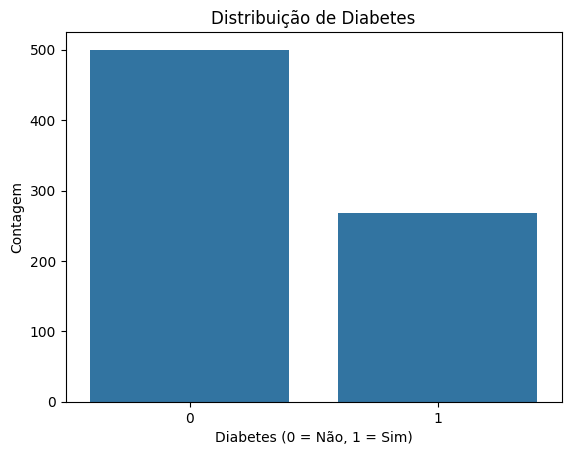

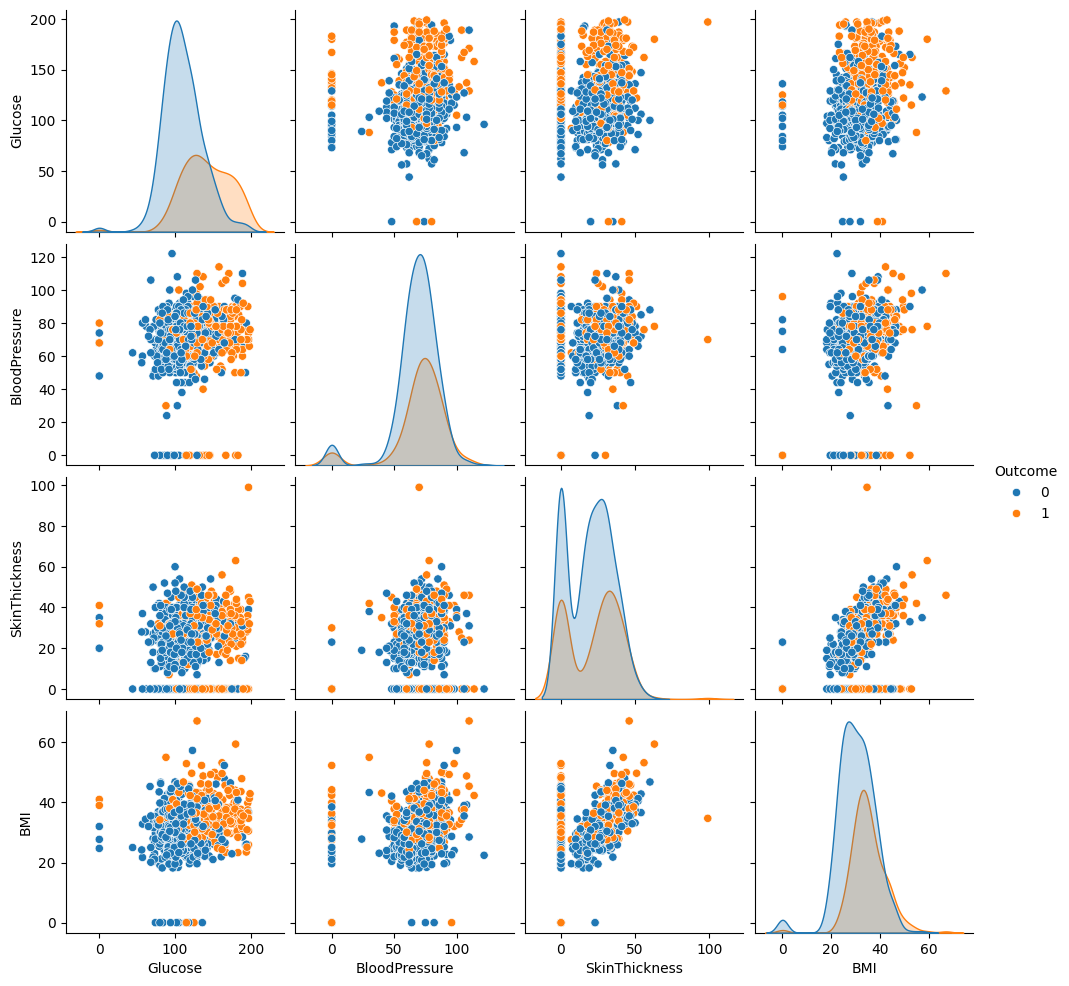

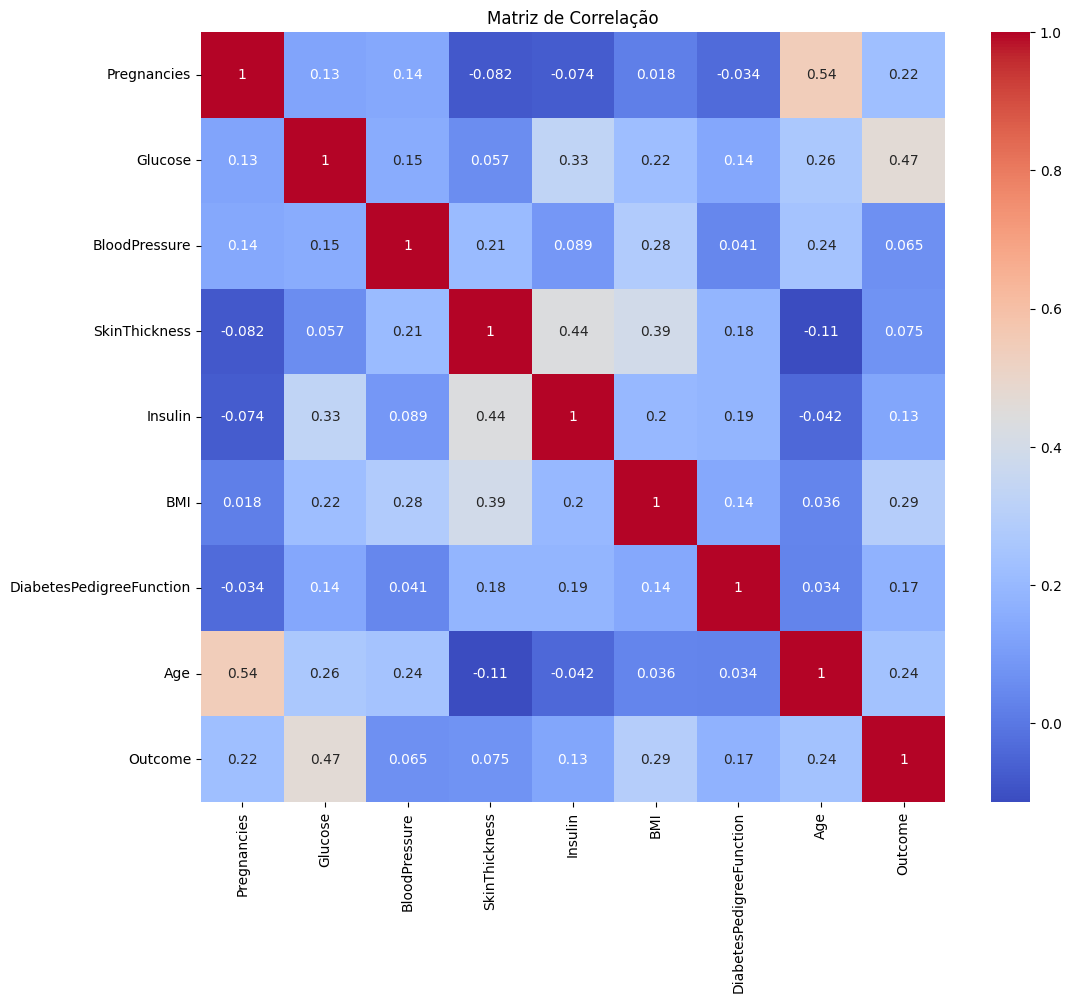

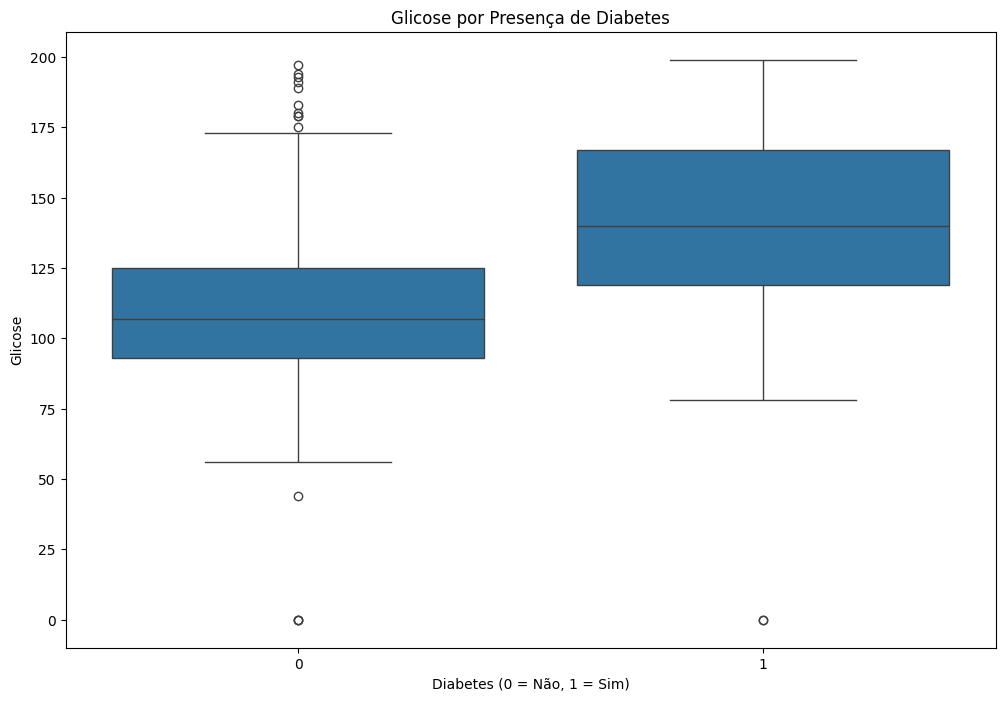

Acurácia: 0.7467532467532467
Matriz de Confusão:
[[78 21]
 [18 37]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importando o conjunto de dados Diabetes
url_diabetes = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df_diabetes = pd.read_csv(url_diabetes)

# Exibindo as primeiras linhas do conjunto de dados
print(df_diabetes.head())

# Informações básicas sobre o conjunto de dados
print(df_diabetes.info())

# Estatísticas descritivas
print(df_diabetes.describe())

# Distribuição dos valores de Outcome (0 = Não-Diabetes, 1 = Diabetes)
sns.countplot(x='Outcome', data=df_diabetes)
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# Pairplot para visualizar relações entre algumas características
sns.pairplot(df_diabetes, hue='Outcome', vars=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI'])
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_diabetes.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot para visualizar a distribuição de Glucose por Outcome
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Glucose', data=df_diabetes)
plt.title('Glicose por Presença de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Glicose')
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_teste, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)

